In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('DelayedFlights.csv')
df = df.drop("Unnamed: 0",1)
df = df[df["Month"].isin([10,11,12])]
df.head()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1524285,2008,10,3,5,1742.0,1730,1901.0,1905,WN,2155,...,8.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524286,2008,10,3,5,1906.0,1900,2211.0,2220,WN,45,...,4.0,5.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524287,2008,10,3,5,1602.0,1550,1655.0,1650,WN,33,...,2.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524288,2008,10,3,5,2148.0,2120,2240.0,2215,WN,55,...,1.0,9.0,0,N,0,0.0,0.0,0.0,0.0,25.0
1524289,2008,10,3,5,2149.0,2130,2252.0,2235,WN,1079,...,5.0,7.0,0,N,0,7.0,0.0,0.0,0.0,10.0


In [2]:
df['TaxiOut'].fillna(0, inplace=True)##### needed for later

cancelled = df[df['Cancelled']==1]

cancelled.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1934590,2008,12,7,7,1526.0,1444,NaN,1654,DL,1743,...,NaN,0.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1935491,2008,12,10,3,1431.0,1422,NaN,1527,DL,1405,...,NaN,0.0,1,C,0,NaN,NaN,NaN,NaN,NaN
1935651,2008,12,10,3,1459.0,1447,NaN,1650,DL,1706,...,NaN,37.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1935876,2008,12,11,4,1026.0,955,NaN,1219,DL,892,...,NaN,0.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1936470,2008,12,12,5,703.0,630,NaN,734,DL,1372,...,NaN,33.0,1,B,0,NaN,NaN,NaN,NaN,NaN


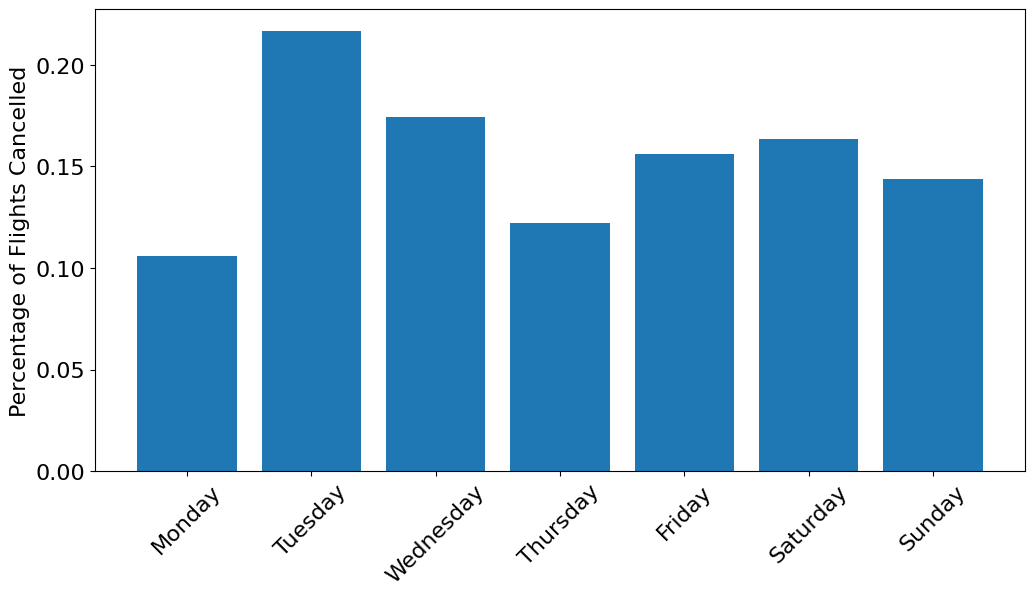

In [3]:
import matplotlib.pyplot as plt

font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['Cancelled'].groupby(df['DayOfWeek']).count()
days_total = df['Cancelled'].groupby(df['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

plt.show()

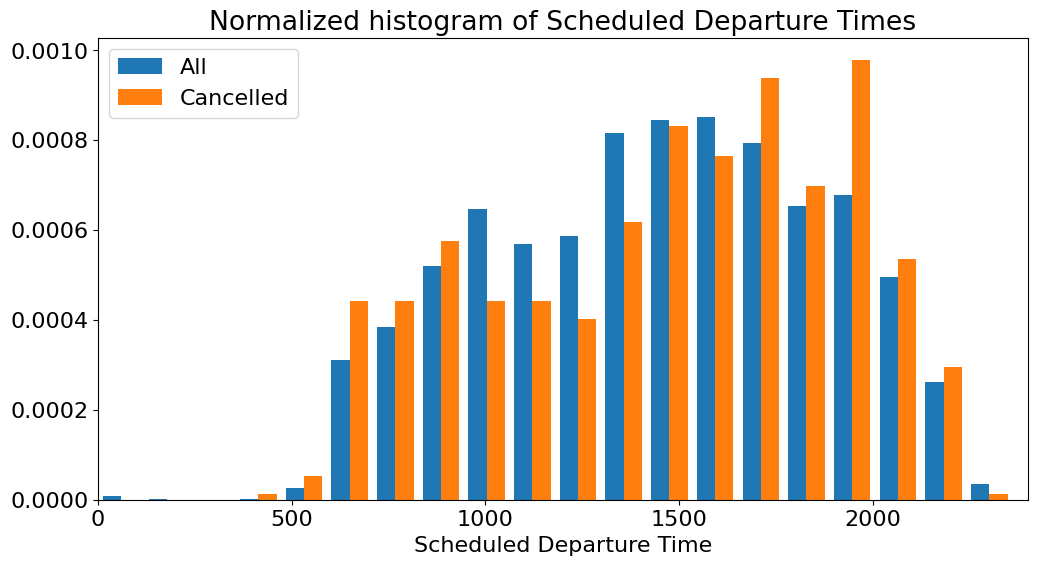

In [5]:
df['CRSDepTime'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRSDepTime'], cancelled['CRSDepTime']],  density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

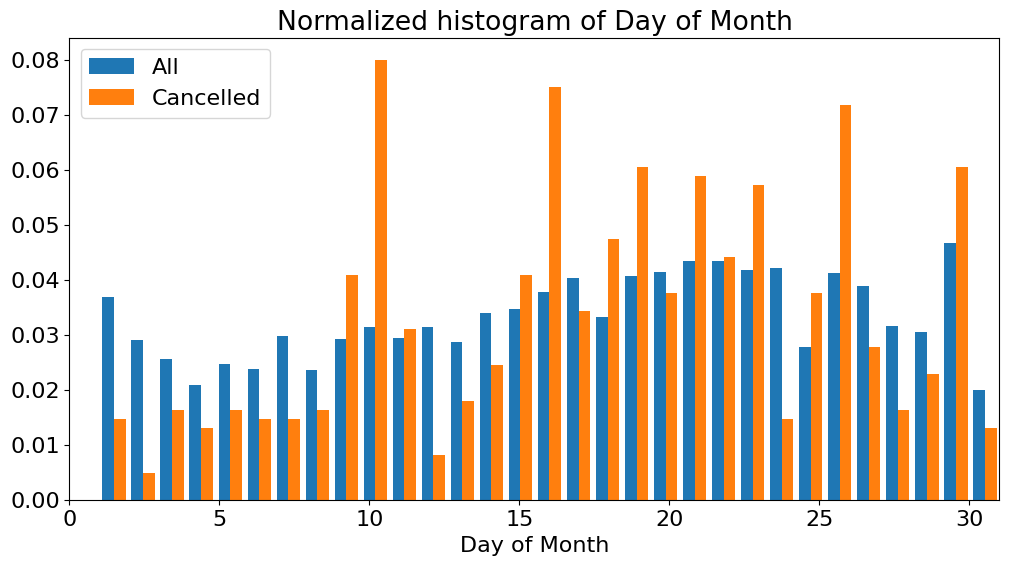

In [6]:
df['DayofMonth'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DayofMonth'], cancelled['DayofMonth']],  density=True, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

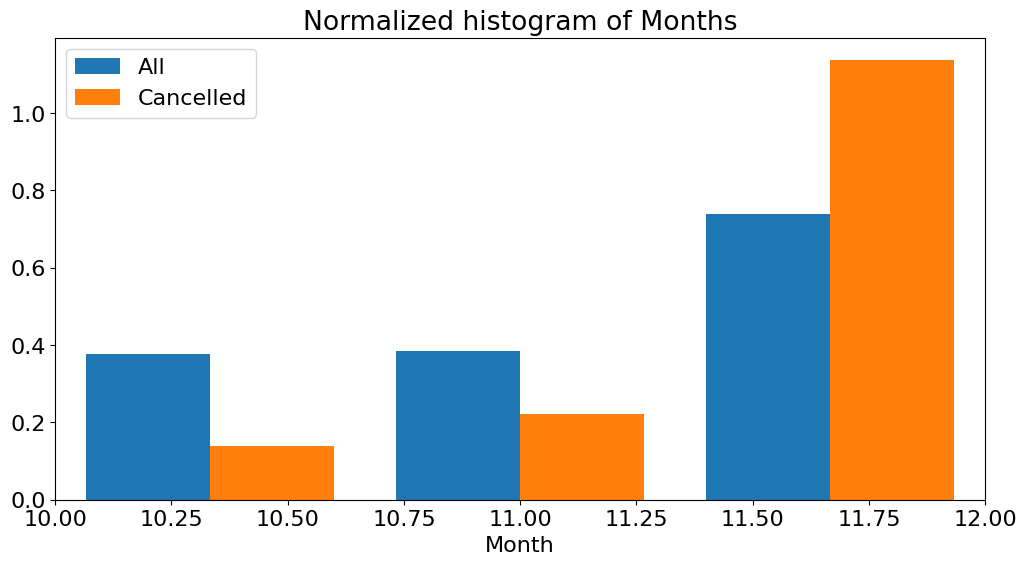

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['Month'], cancelled['Month']], density = True, bins=3, label=['All', 'Cancelled'])

ax.set_xlim(10,12)

ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')

plt.legend()
plt.show()

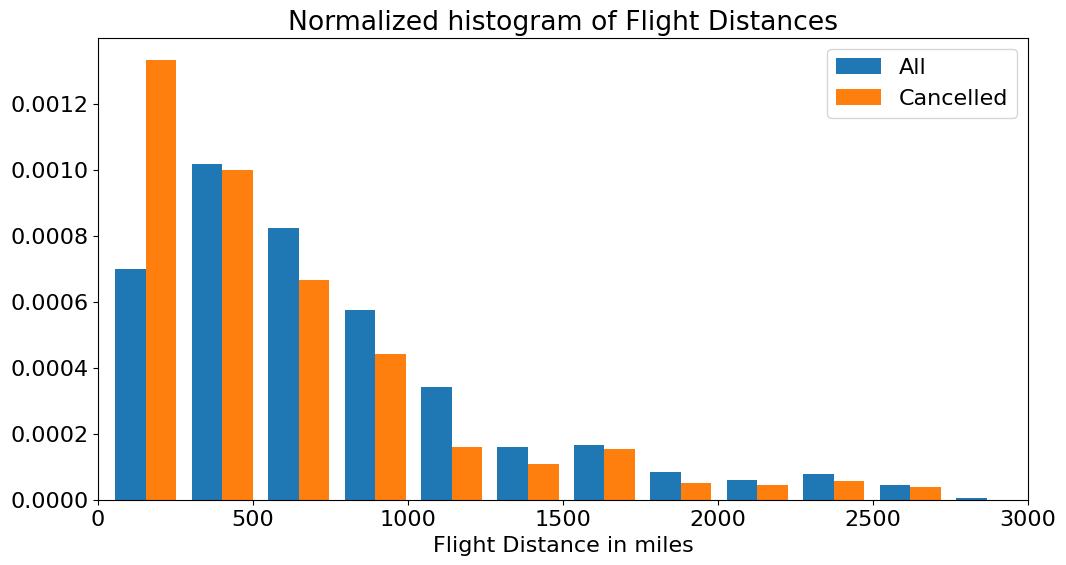

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['Distance'], cancelled['Distance']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

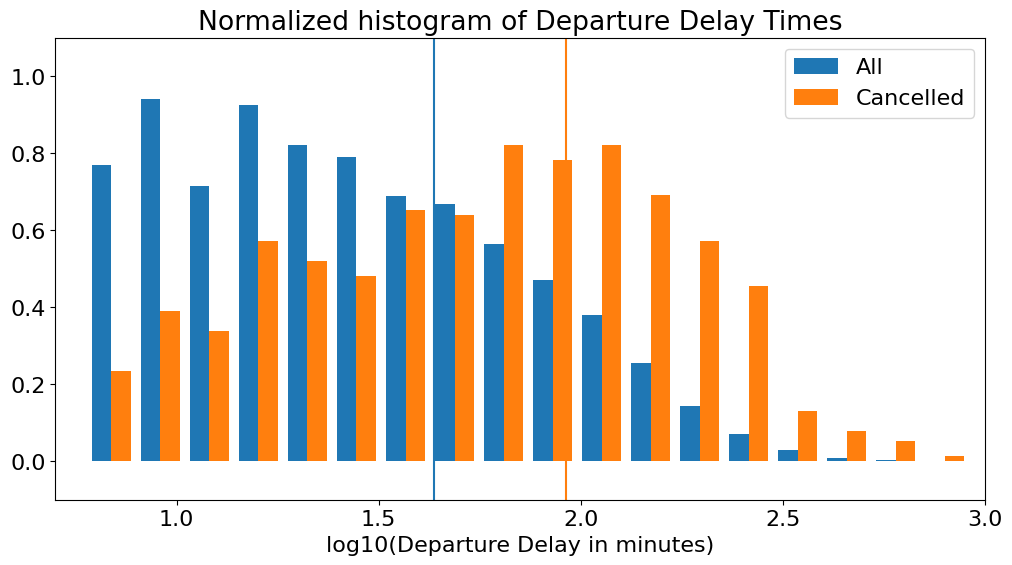

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

all_delay_log = np.log10(df['DepDelay'])
adl_mean = np.log10(np.mean(df['DepDelay']))

cancelled_delay_log = np.log10(cancelled['DepDelay'])
cdl_mean = np.log10(np.mean(cancelled['DepDelay']))

ax.hist([all_delay_log, cancelled_delay_log], density =True, bins=20, label=['All', 'Cancelled'])
#ax.hist([df['DepDelay'], cancelled['DepDelay']], normed=1, bins=np.logspace(0.8,2.5, 30), label=['All', 'Cancelled'])

ax.plot([adl_mean, adl_mean],[-1,2],color='#1f77b4')
ax.plot([cdl_mean, cdl_mean],[-1,2],color='#ff7f0e')
ax.set_xlim(0.7,3)
ax.set_ylim(-0.1,1.1)
#ax.set_xscale("log", nonposx='clip')
#plt.gca().set_xscale("log")
ax.set_xlabel('log10(Departure Delay in minutes)')
ax.set_title('Normalized histogram of Departure Delay Times')

plt.legend()
plt.show()

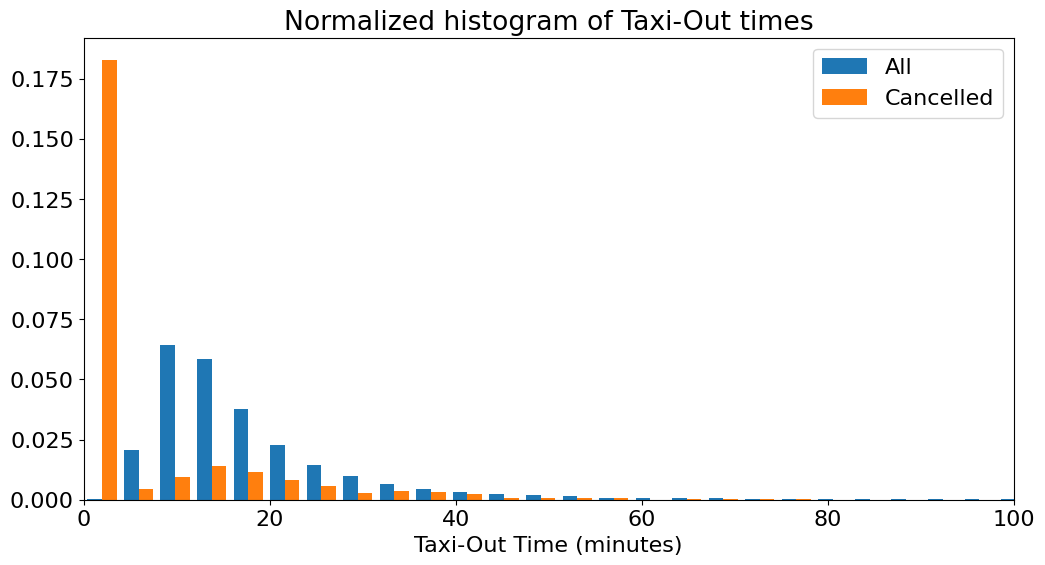

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['TaxiOut'], cancelled['TaxiOut']], density=True, bins=100, label=['All', 'Cancelled'])

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()

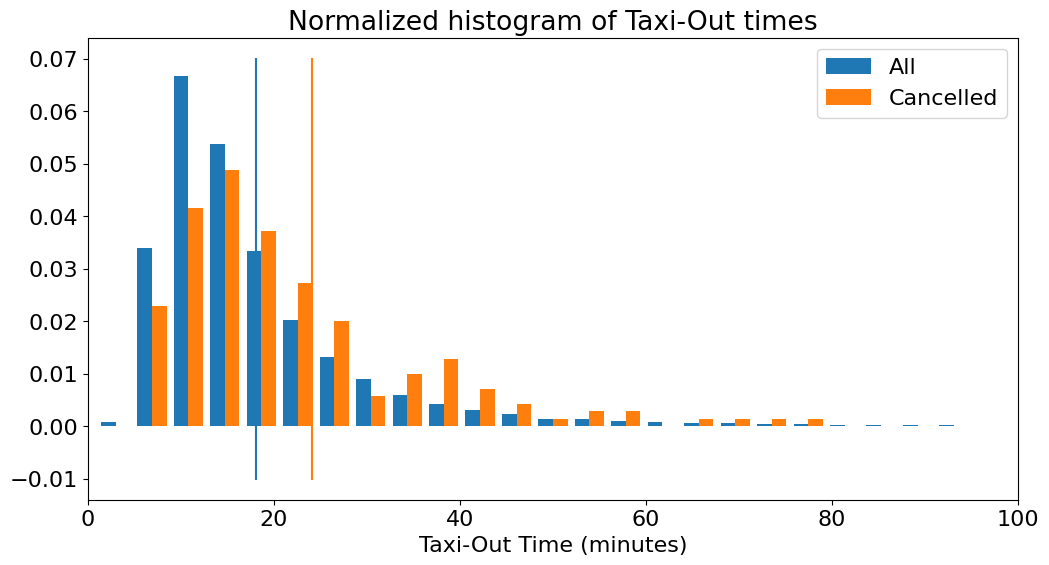

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

x = df['TaxiOut'][df['TaxiOut' ] > 0]
y = cancelled['TaxiOut'][cancelled['TaxiOut' ] > 0]

x_mean = np.mean(x)
y_mean = np.mean(y)

ax.hist([x, y], density=True, bins=100, label=['All', 'Cancelled'])
ax.plot([x_mean, x_mean],[-0.01,0.07],color='#1f77b4')
ax.plot([y_mean, y_mean],[-0.01,0.07],color='#ff7f0e')

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()

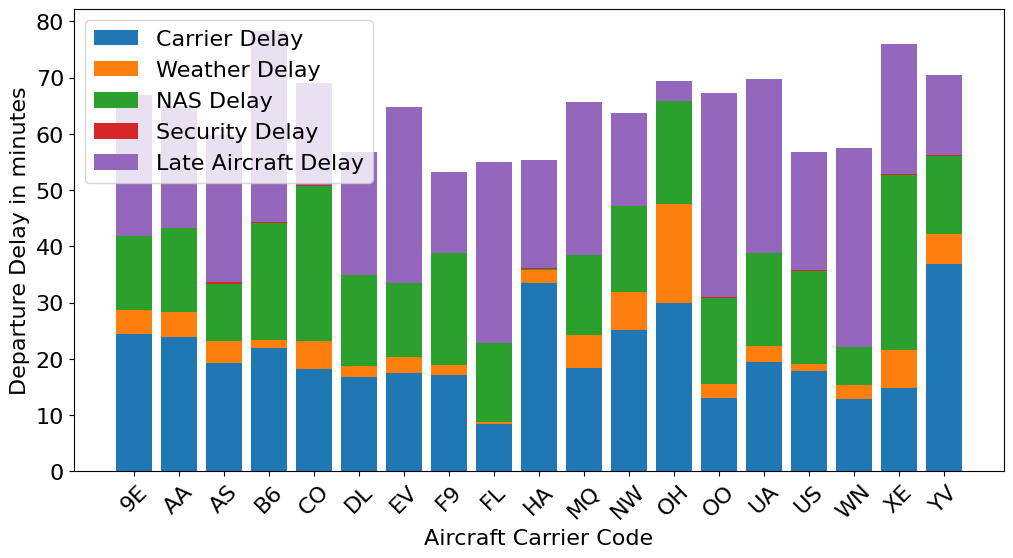

In [12]:
import matplotlib.pyplot as plt

df['total_delay'] = (df['CarrierDelay'] + df['WeatherDelay']
             + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['CarrierDelay'].groupby(df_delayed['UniqueCarrier']).mean()
weather_group = df_delayed['WeatherDelay'].groupby(df_delayed['UniqueCarrier']).mean()
nas_group = df_delayed['NASDelay'].groupby(df_delayed['UniqueCarrier']).mean()
security_group = df_delayed['SecurityDelay'].groupby(df_delayed['UniqueCarrier']).mean()
late_group = df_delayed['LateAircraftDelay'].groupby(df_delayed['UniqueCarrier']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values
x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

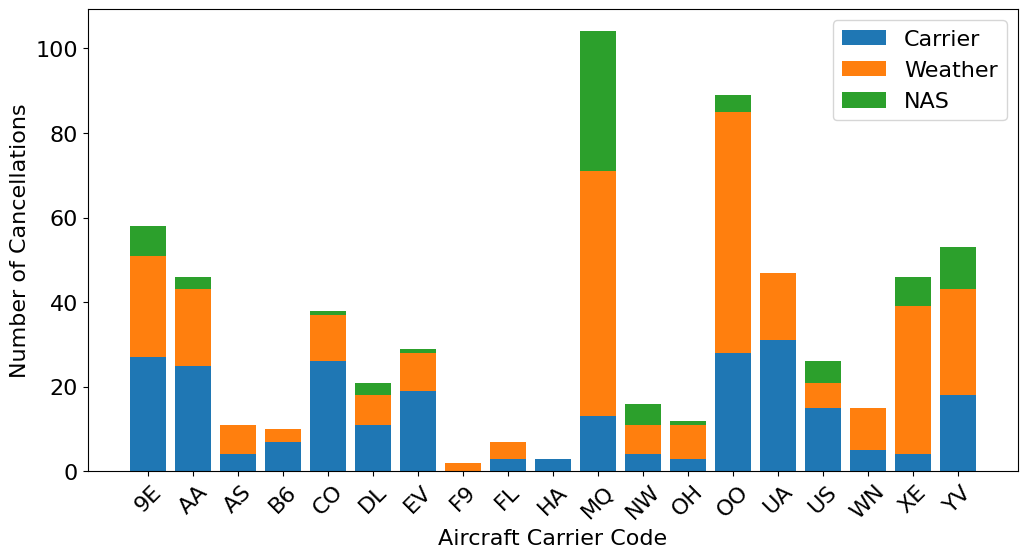

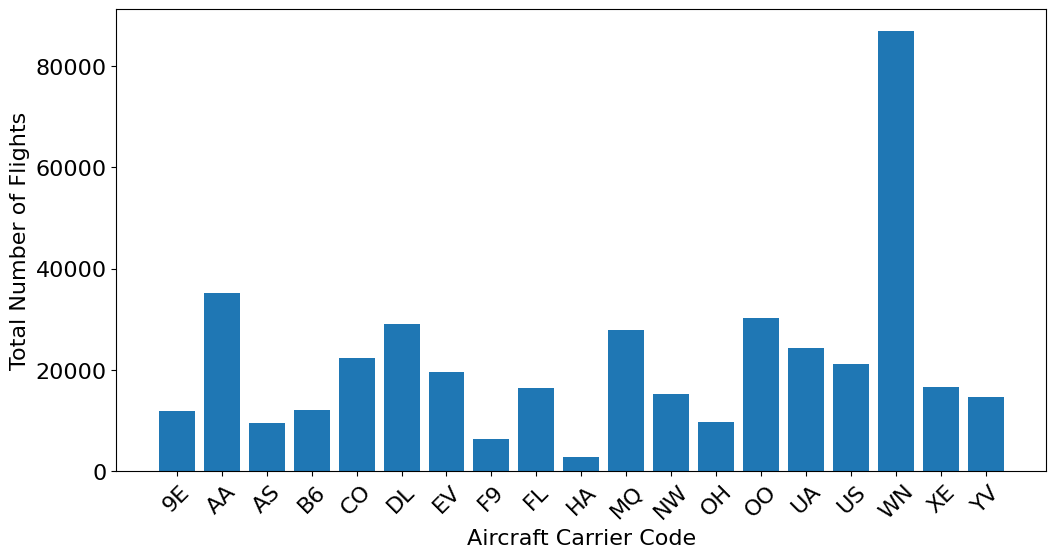

In [13]:
import matplotlib.pyplot as plt

cancelled_group = cancelled.groupby(['UniqueCarrier','CancellationCode']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'B'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')
ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['UniqueCarrier'].groupby(df['UniqueCarrier']).count()

fig, ax1 = plt.subplots(figsize = (12,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

In [14]:
carrier_flights = df['UniqueCarrier'].groupby(df['UniqueCarrier']).count()
carrier_cancelled = df['Cancelled'].groupby(df['UniqueCarrier']).sum()
carrier_delayed = df_delayed['UniqueCarrier'].groupby(df_delayed['UniqueCarrier']).count()
carrier_diverted = df['Diverted'].groupby(df['UniqueCarrier']).sum()
carrier_avg_time = df['AirTime'].groupby(df['UniqueCarrier']).mean()
carrier_avg_dist = df['Distance'].groupby(df['UniqueCarrier']).mean()
carrier_avg_delay = df['total_delay'].groupby(df['UniqueCarrier']).mean()
carrier_avg_taxiIn = df['TaxiIn'].groupby(df['UniqueCarrier']).mean()
carrier_avg_taxiOut = df['TaxiOut'].groupby(df['UniqueCarrier']).mean()
carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)
carrier_names = pd.Series(['Pinnacle Airlines', 'American Airlines', 'Alaska Airlines', 'Jetblue Airways',
                      'Cobaltair', 'Delta Air Lines', 'ExpressJet Airlines', 'Frontier Airlines', 'AirTran Airways',
                      'Hawaiian Airlines', 'Envoy Air', 'Northwest Airlines', 'US Airways Express', 
                      'SkyWest Airlines', 'United Airlines', 'US Airways', 'Southwest Airlines',
                      'JetSuiteX Air', 'Mesa Airlines'], index=carrier_flights.index)

summary_table_carrier = pd.concat([carrier_names, carrier_flights, carrier_cancelled, carrier_pct_cancelled, 
                                   carrier_diverted, 
                           carrier_avg_time, carrier_avg_dist, carrier_avg_delay,
                          carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = ['Carrier Name', 'Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']



summary_table_carrier

,Carrier Name,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
UniqueCarrier,,,,,,,,,,
9E,Pinnacle Airlines,11937,58,0.485884,63,72.894719,464.624948,47.624277,8.475978,21.973528
AA,American Airlines,35258,46,0.130467,179,145.698113,1092.076975,40.333173,7.967969,18.042288
AS,Alaska Airlines,9450,11,0.116402,93,132.762465,959.377566,38.960741,5.923463,16.882646
B6,Jetblue Airways,12051,10,0.082981,131,145.767842,1073.504937,51.367355,6.380243,22.982574
CO,Cobaltair,22373,38,0.169848,90,166.178242,1244.587226,39.875788,8.415192,23.021186
DL,Delta Air Lines,29135,21,0.072078,103,122.873358,885.774429,37.463154,9.197216,22.701424
EV,ExpressJet Airlines,19559,29,0.148269,76,70.906497,449.764712,47.819572,7.229298,18.659338
F9,Frontier Airlines,6479,2,0.030869,4,118.392554,864.380151,32.132119,7.034275,15.996450
FL,AirTran Airways,16373,7,0.042753,36,101.353521,701.271361,36.303426,7.449220,16.586637


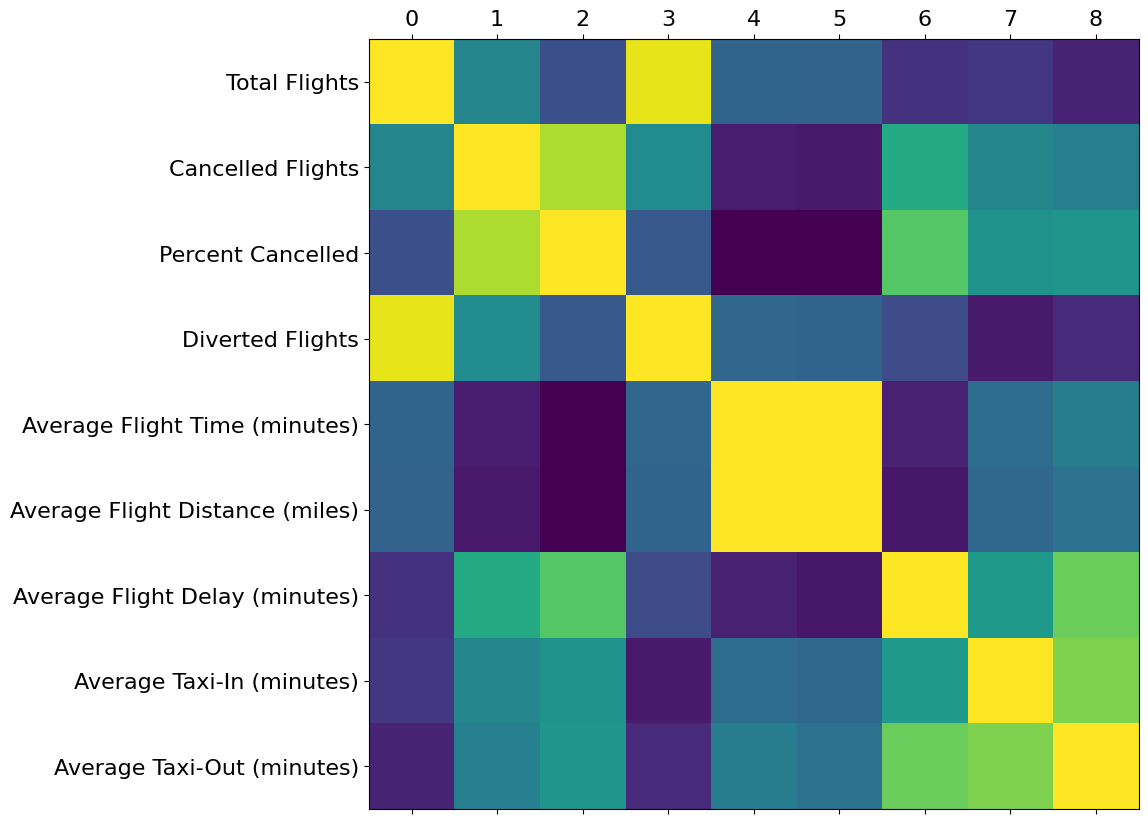

In [15]:
#plt.matshow(summary_table_carrier.corr())
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    #plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(summary_table_carrier)

plt.show()

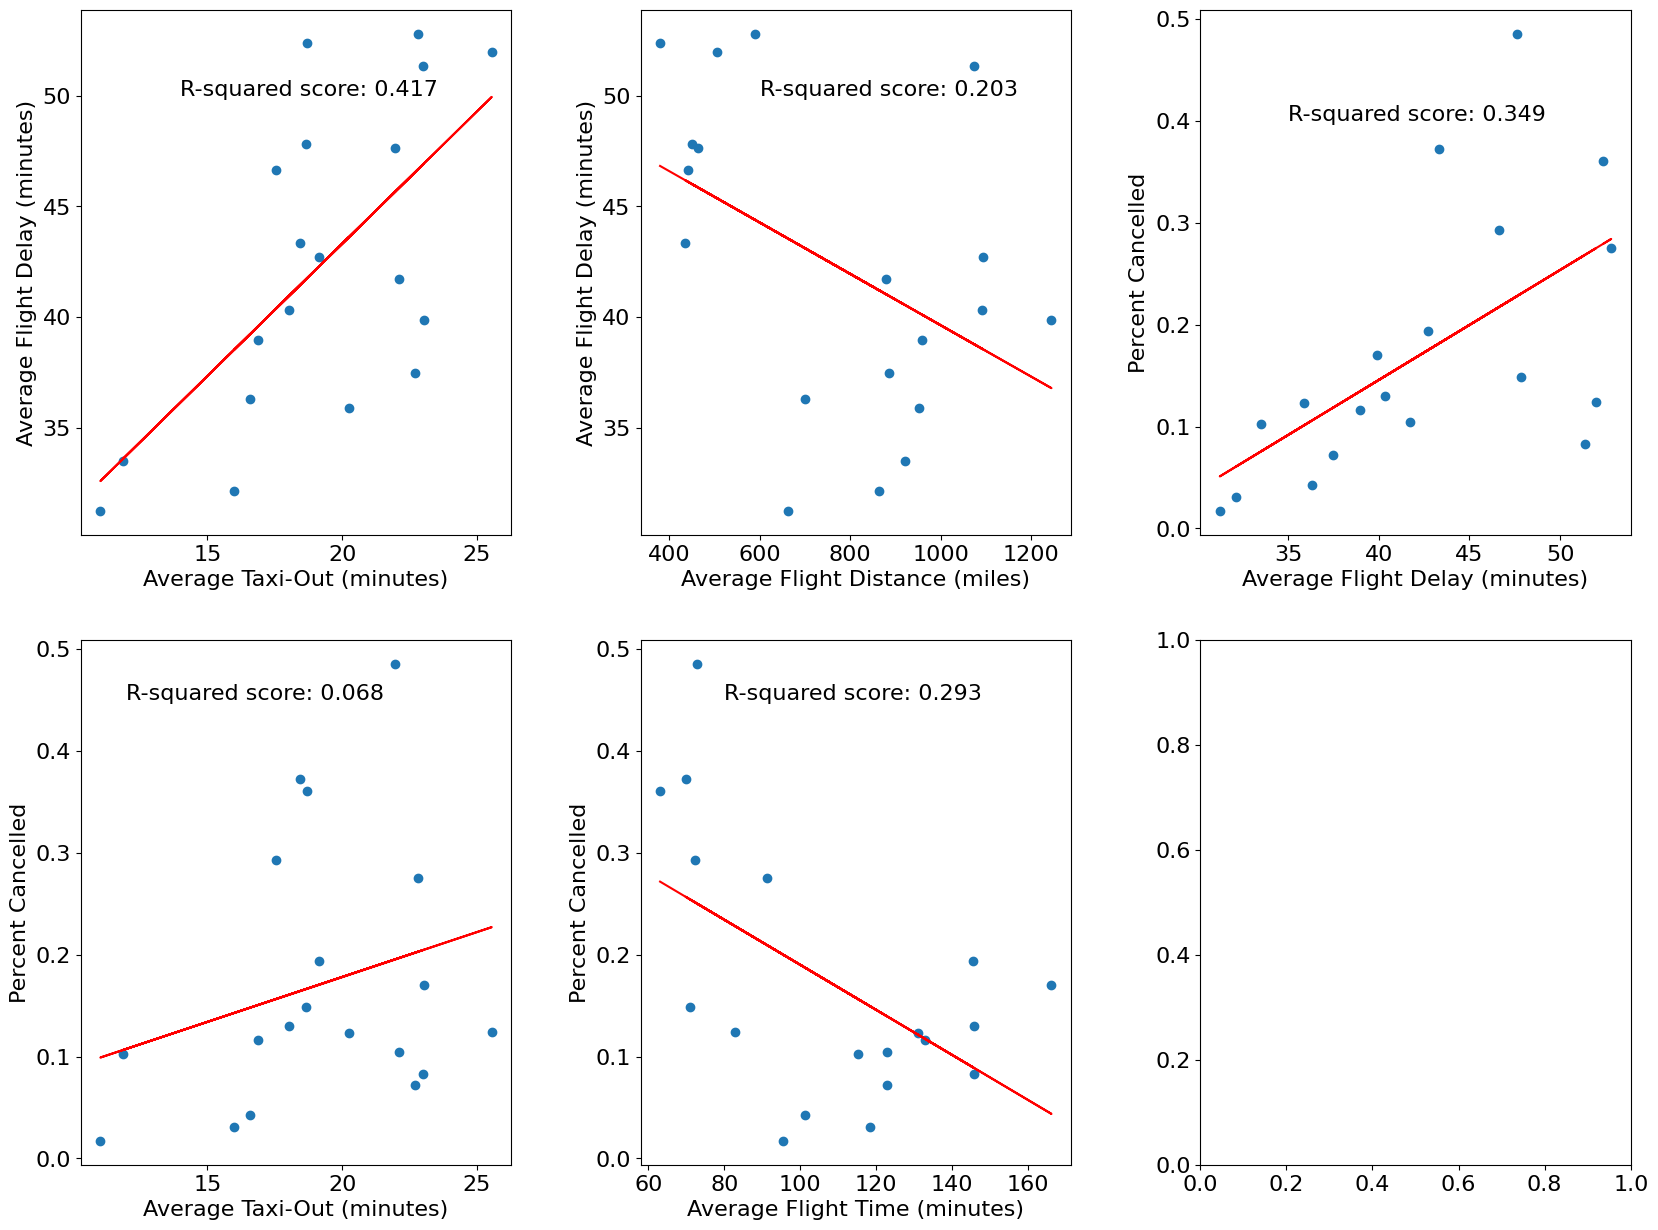

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))


ax1.scatter(carrier_avg_taxiOut, carrier_avg_delay)
X = carrier_avg_taxiOut.values.reshape(-1,1)
linreg = LinearRegression().fit(X, carrier_avg_delay)
ax1.plot(carrier_avg_taxiOut, linreg.coef_ * carrier_avg_taxiOut + linreg.intercept_, 'r-')
ax1.text(14,50,'R-squared score: {:.3f}'
     .format(linreg.score(X, carrier_avg_delay)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')
####################################################################################

ax2.scatter(carrier_avg_dist, carrier_avg_delay)
X = carrier_avg_dist.values.reshape(-1,1)
linreg = LinearRegression().fit(X, carrier_avg_delay)
ax2.plot(carrier_avg_dist, linreg.coef_ * carrier_avg_dist + linreg.intercept_, 'r-')
ax2.text(600,50,'R-squared score: {:.3f}'
     .format(linreg.score(X, carrier_avg_delay)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')

####################################################################################
X = summary_table_carrier['Average Flight Delay (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(35,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################
X = summary_table_carrier['Average Taxi-Out (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(12,0.45,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-Out (minutes)')
ax4.set_ylabel('Percent Cancelled')

####################################################################################
X = summary_table_carrier['Average Flight Time (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax5.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax5.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax5.text(80,0.45,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax5.set_xlabel('Average Flight Time (minutes)')
ax5.set_ylabel('Percent Cancelled')

fig.subplots_adjust(hspace=0.2, wspace=0.3)

plt.show()


In [17]:
origin_flights = df['Origin'].groupby(df['Origin']).count()
origin_cancelled = df['Cancelled'].groupby(df['Origin']).sum()
origin_delayed = df_delayed['UniqueCarrier'].groupby(df_delayed['Origin']).count()
origin_diverted = df['Diverted'].groupby(df['Origin']).sum()
origin_avg_time = df['AirTime'].groupby(df['Origin']).mean()
origin_avg_dist = df['Distance'].groupby(df['Origin']).mean()
origin_avg_delay = df['total_delay'].groupby(df['Origin']).mean()
#origin_avg_taxiIn = df['TaxiIn'].groupby(df['Origin']).mean()
origin_avg_taxiOut = df['TaxiOut'].groupby(df['Origin']).mean()
origin_pct_cancelled = 100*np.divide(origin_cancelled, origin_flights)

summary_table_origin = pd.concat([origin_flights, origin_cancelled, origin_pct_cancelled, origin_diverted, 
                           origin_avg_time, origin_avg_dist, origin_avg_delay,
                           origin_avg_taxiOut], axis=1)

summary_table_origin.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-Out (minutes)']
summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)
summary_table_origin.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-Out (minutes)
Origin,,,,,,,,
ATL,32157,33,0.102622,120,93.764029,649.837858,38.048139,23.169543
ORD,24381,86,0.352734,117,101.559103,710.391863,48.917190,22.383741
DFW,18235,27,0.148067,80,109.968226,814.646065,32.432026,17.156128
DEN,16533,35,0.211698,75,112.546916,836.475050,35.058247,17.613016
PHX,12209,8,0.065525,61,116.897611,899.911213,30.473176,14.464903
IAH,11597,48,0.413900,46,124.632618,931.679400,34.635854,21.887126
LAS,11549,13,0.112564,40,118.875783,941.938523,36.881895,16.188415
LAX,11493,17,0.147916,57,136.933357,1096.913687,34.186374,14.293918
EWR,10946,12,0.109629,52,157.030417,1067.265942,48.545862,30.414307


TypeError: __init__() got an unexpected keyword argument 'axis'

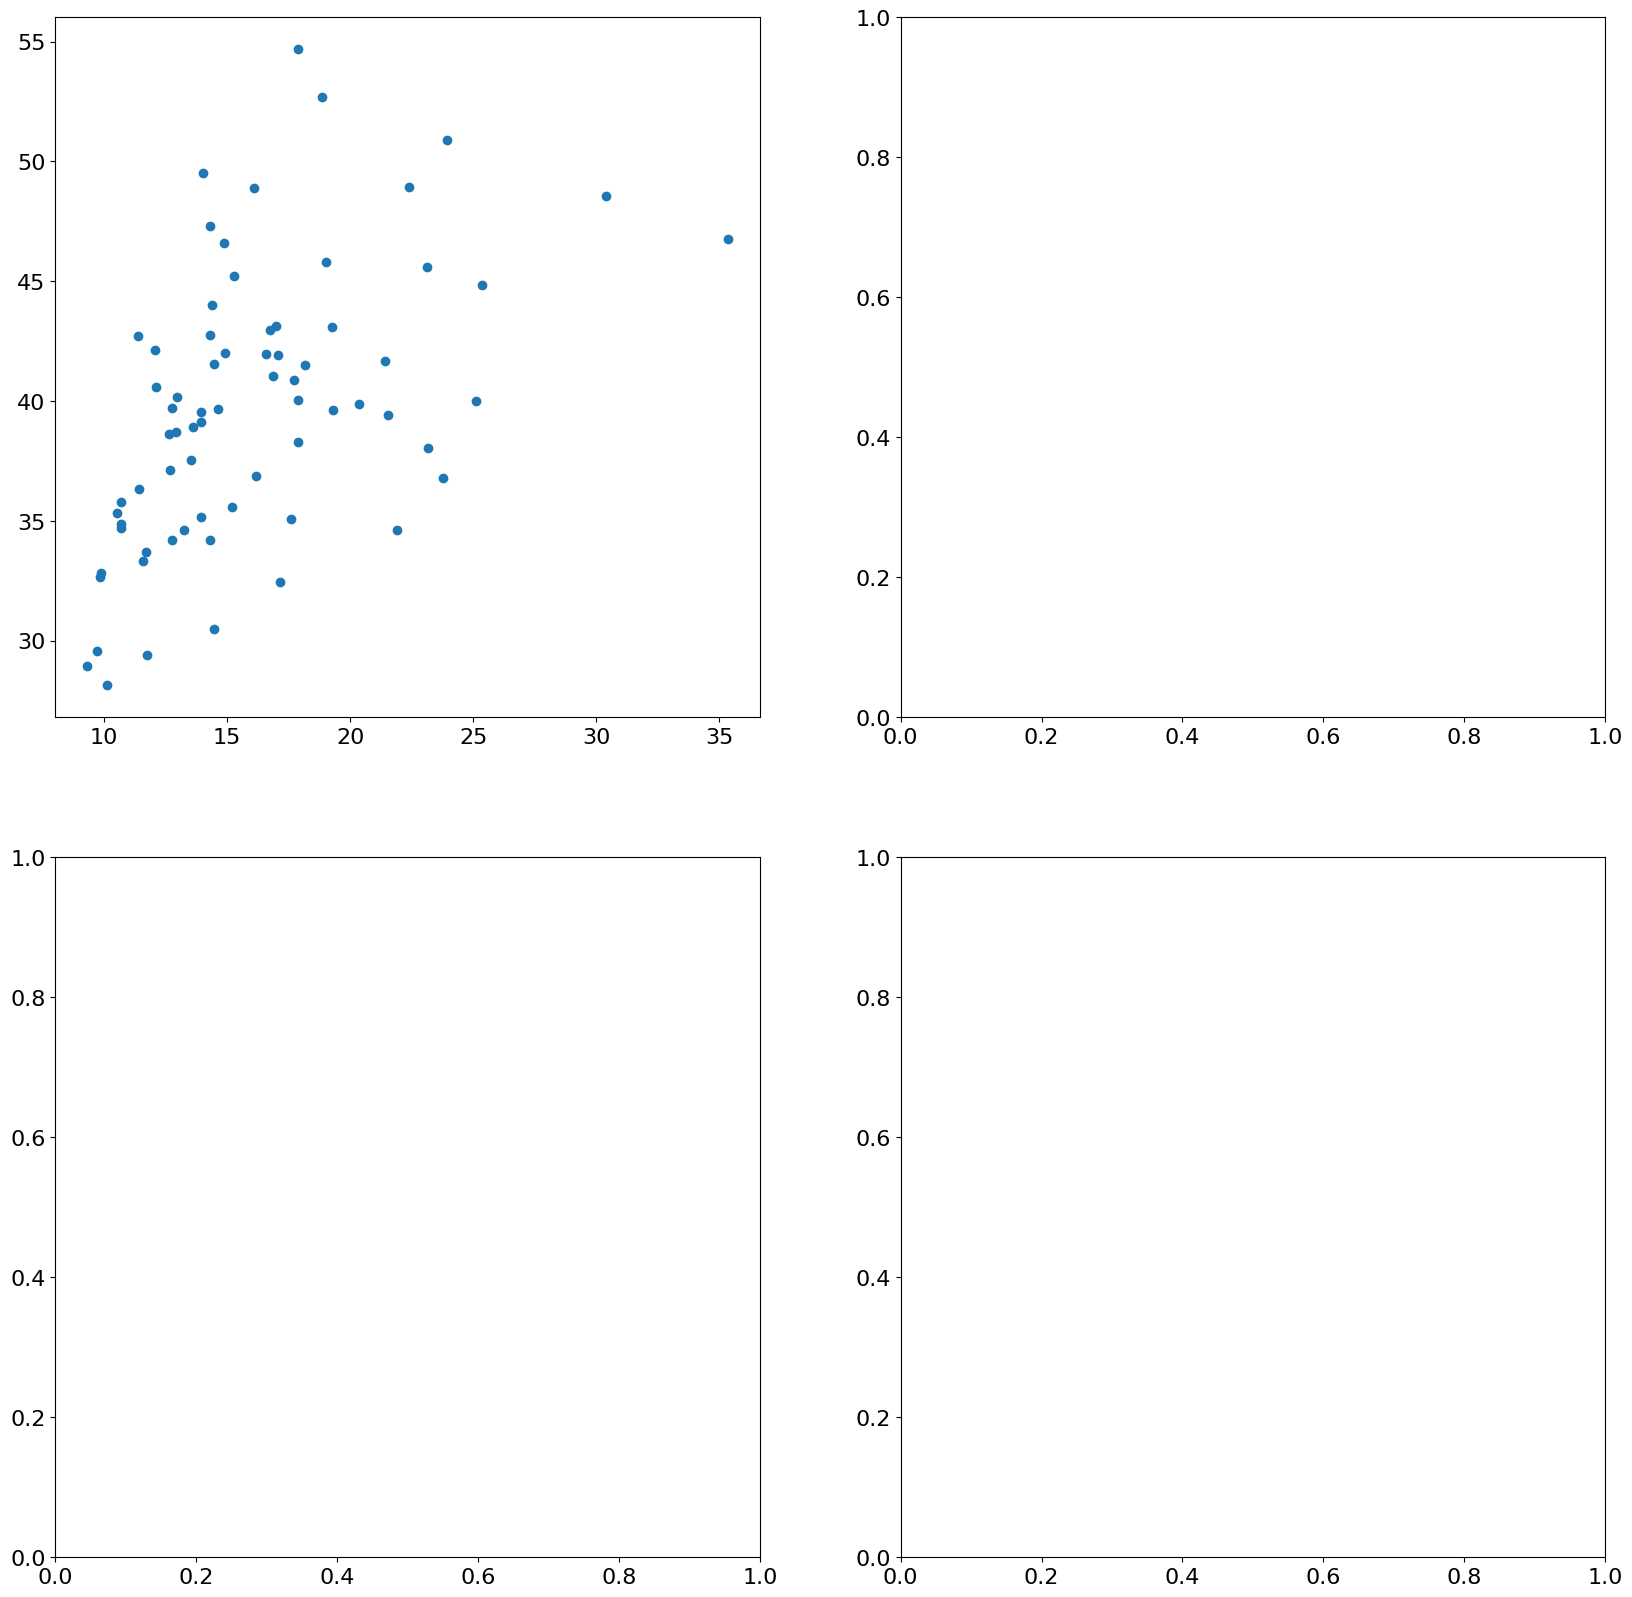

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df1 = summary_table_origin[summary_table_origin['Total Flights']>1000]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

X = df1['Average Taxi-Out (minutes)']
y = df1['Average Flight Delay (minutes)']
ax1.scatter(X, y)

X = X.values.reshape(-1,1)
y = y.values.reshape(1,-1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)

y_imputer = SimpleImputer(axis=1)

y_imputed = y_imputer.fit_transform(y)
y_imputed = y_imputed[0]
linreg = LinearRegression().fit(X, y_imputed)
ax1.plot(origin_avg_taxiOut, linreg.coef_ * origin_avg_taxiOut + linreg.intercept_, 'r-')
ax1.text(10,52,'R-squared score: {:.3f}'
     .format(linreg.score(X, y_imputed)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = df1['Average Flight Distance (miles)']
y = df1['Average Flight Delay (minutes)']
ax2.scatter(X, y)

X = X.values.reshape(-1,1)
y = y.values.reshape(1,-1)

linreg = LinearRegression().fit(X, y_imputed)
ax2.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax2.text(600,52,'R-squared score: {:.3f}'
     .format(linreg.score(X, y_imputed)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')
X = df1['Average Flight Delay (minutes)']
y = df1['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(36,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = df1['Average Taxi-Out (minutes)']
y = df1['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)
linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(20,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-Out (minutes)')
ax4.set_ylabel('Percent Cancelled')

plt.show()

In [23]:
dest_flights = df['Dest'].groupby(df['Dest']).count()
dest_cancelled = df['Cancelled'].groupby(df['Dest']).sum()
dest_delayed = df_delayed['UniqueCarrier'].groupby(df_delayed['Dest']).count()
dest_diverted = df['Diverted'].groupby(df['Dest']).sum()
dest_avg_time = df['AirTime'].groupby(df['Dest']).mean()
dest_avg_dist = df['Distance'].groupby(df['Dest']).mean()
dest_avg_delay = df['total_delay'].groupby(df['Dest']).mean()
dest_avg_taxiIn = df['TaxiIn'].groupby(df['Dest']).mean()
#dest_avg_taxiOut = df['TaxiOut'].groupby(df['Dest']).mean()
dest_pct_cancelled = 100*np.divide(dest_cancelled, dest_flights)

summary_table_dest = pd.concat([dest_flights, dest_cancelled, dest_pct_cancelled, dest_diverted, 
                           dest_avg_time, dest_avg_dist, dest_avg_delay,
                           dest_avg_taxiIn], axis=1)
summary_table_dest.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)']

summary_table_dest = summary_table_dest.sort_values('Total Flights', ascending=False)
summary_table_dest.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes)
Dest,,,,,,,,
ATL,27816,26,0.093471,48,93.416408,625.337647,45.564531,11.256991
ORD,20354,73,0.358652,123,102.436899,694.210917,56.975680,11.974516
DEN,13877,14,0.100886,9,117.385232,819.719464,37.359300,7.995239
DFW,13745,15,0.109131,67,116.552734,809.275809,38.704547,9.466011
EWR,12548,21,0.167357,38,130.994715,978.786181,62.112847,10.084558
LAX,12523,14,0.111794,46,153.433684,1097.422742,34.556017,8.444782
LAS,11351,7,0.061669,116,136.450303,938.424104,37.442692,6.831926
SFO,10721,6,0.055965,41,144.722316,974.214626,46.686130,6.041542
PHX,10604,9,0.084874,14,137.368018,950.577518,32.783101,6.190373


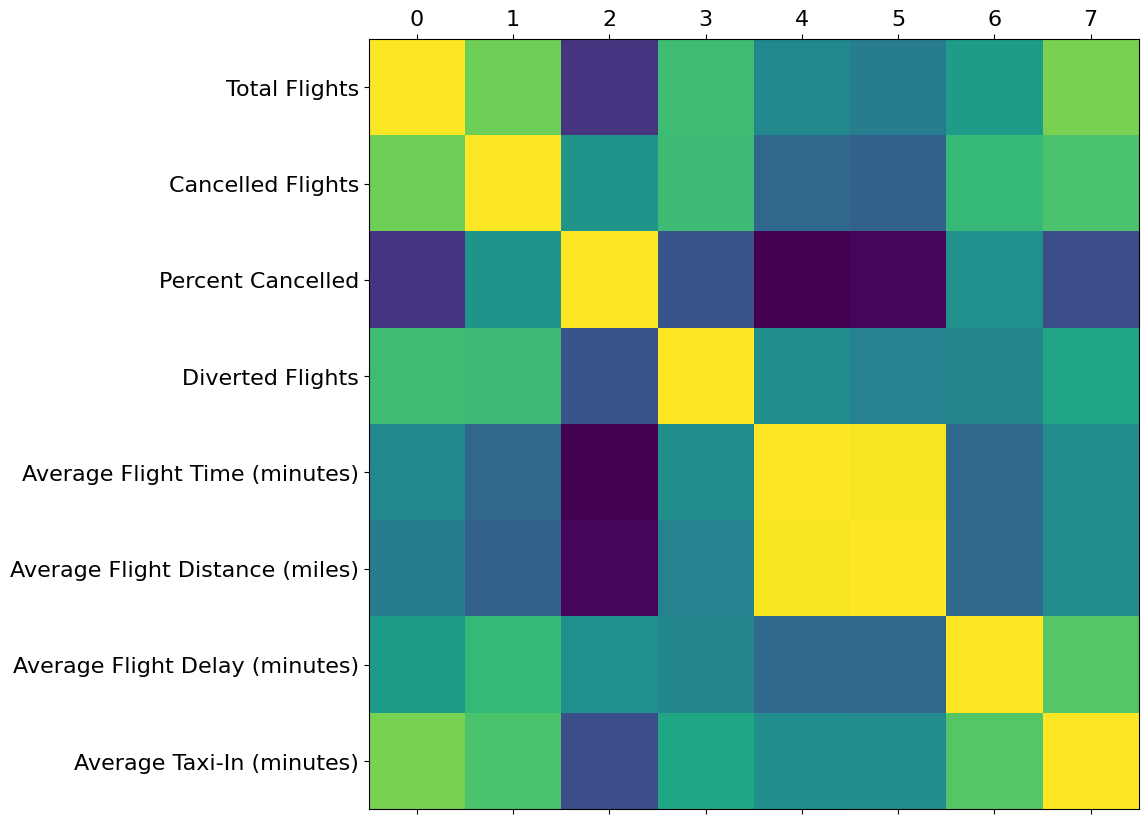

In [24]:
df2 = summary_table_dest[summary_table_dest['Total Flights']>1000]

plot_corr(df2)

plt.show()

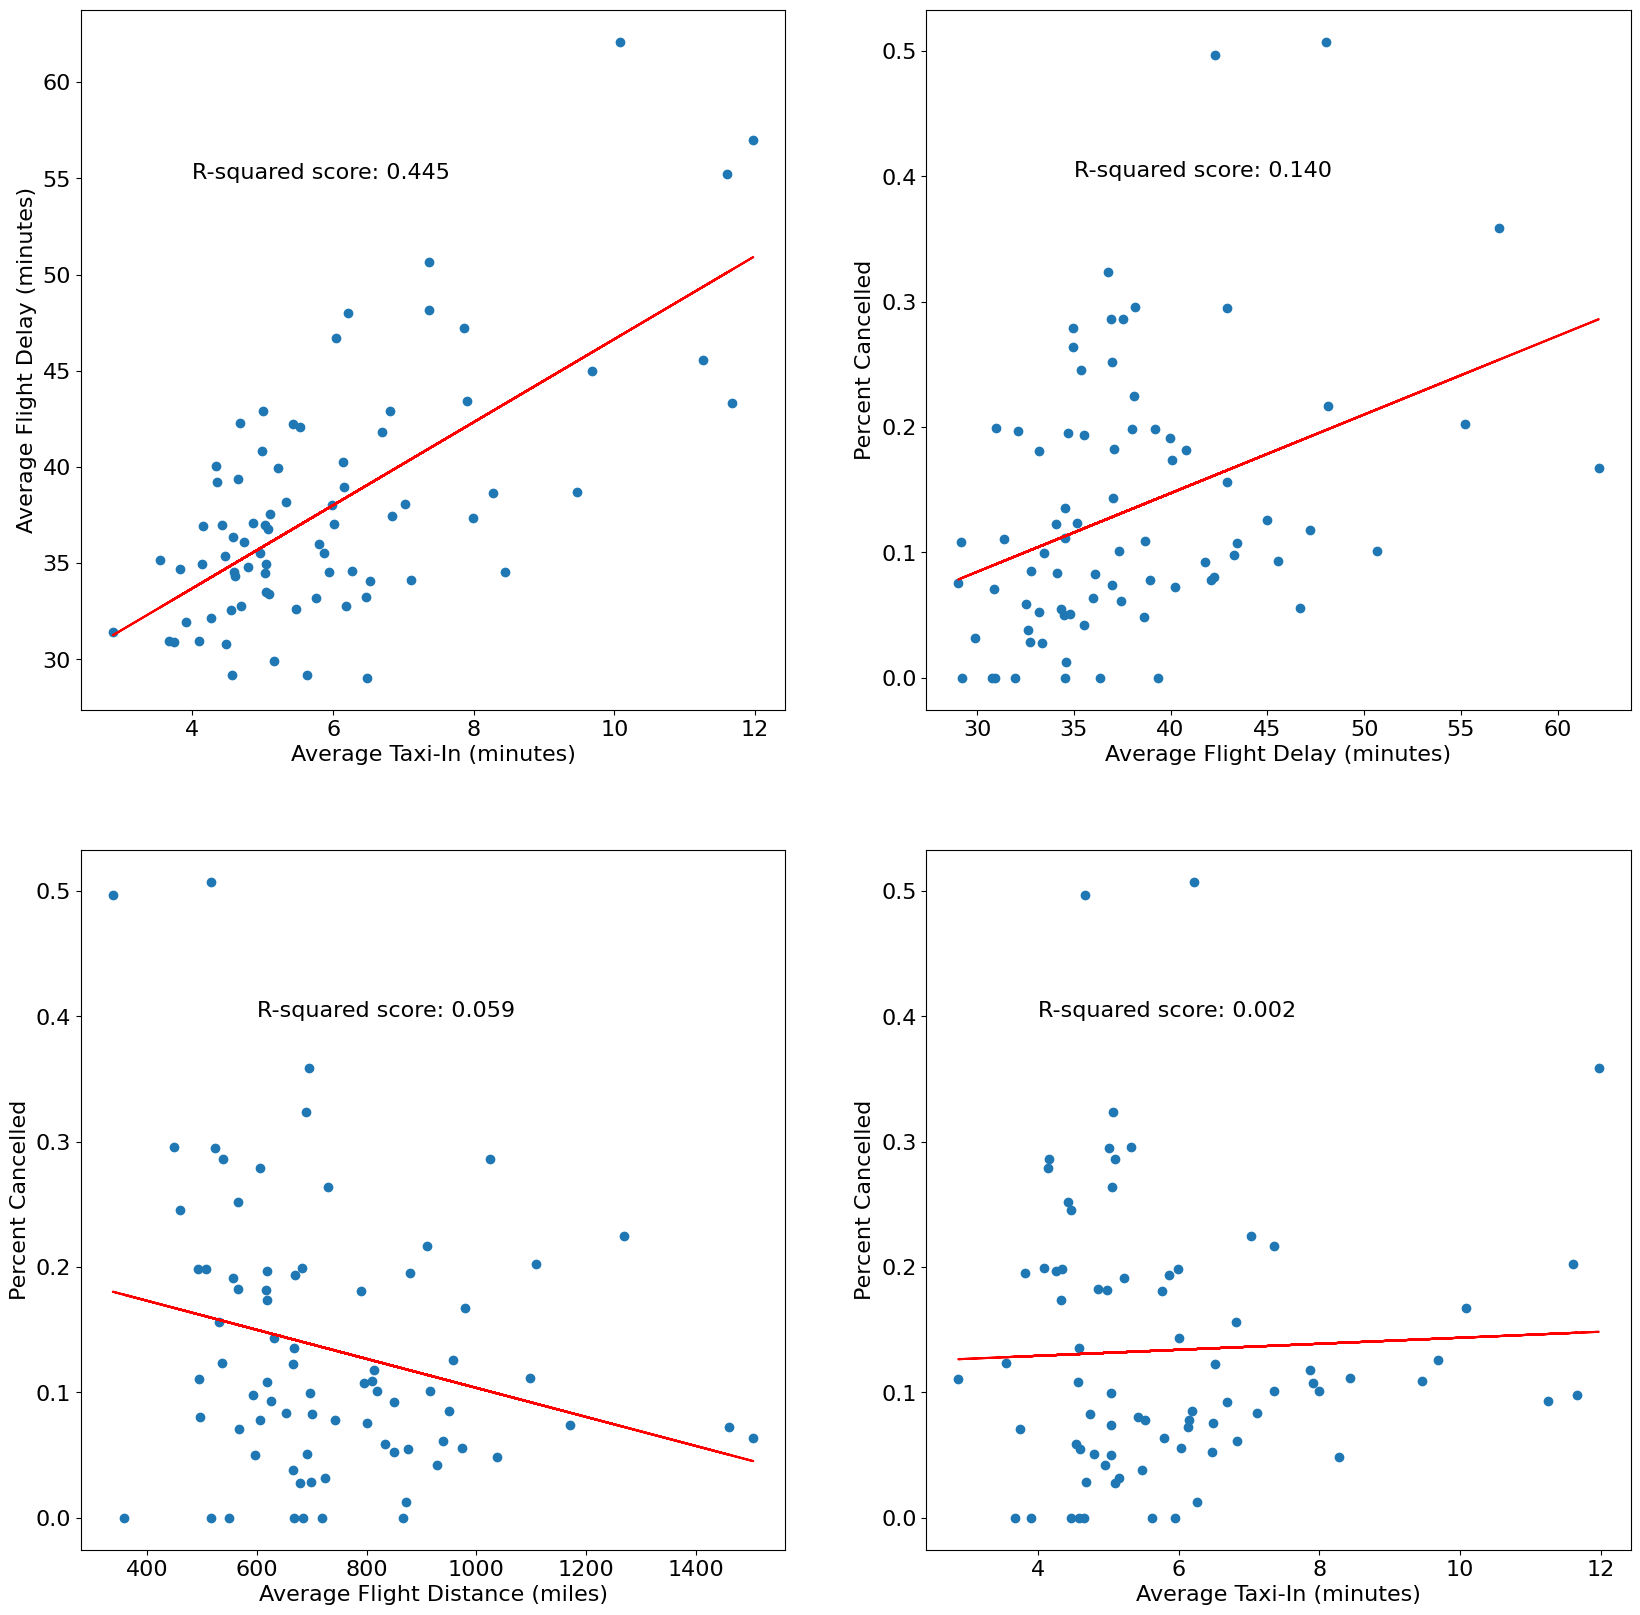

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#df2 = summary_table_dest[summary_table_dest['Cancelled Flights']>1]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

X = df2['Average Taxi-In (minutes)']
y = df2['Average Flight Delay (minutes)']
ax1.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax1.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax1.text(4,55,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax1.set_xlabel('Average Taxi-In (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')
####################################################################################

X = df2['Average Flight Delay (minutes)']
y = df2['Percent Cancelled']
ax2.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax2.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax2.text(35,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax2.set_xlabel('Average Flight Delay (minutes)')
ax2.set_ylabel('Percent Cancelled')

####################################################################################
X = df2['Average Flight Distance (miles)']
y = df2['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(600,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Distance (miles)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = df2['Average Taxi-In (minutes)']
y = df2['Percent Cancelled']
ax4.scatter(X, y)
X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(4,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-In (minutes)')
ax4.set_ylabel('Percent Cancelled')

plt.show()

In [26]:
df['Carrier mean delay'] = df['total_delay'].groupby(df['UniqueCarrier']).transform('mean')
df['Carrier mean distance'] = df['Distance'].groupby(df['UniqueCarrier']).transform('mean')
df['Carrier cancellations'] = df['Cancelled'].groupby(df['UniqueCarrier']).transform('mean')
df['Origin cancellations'] = df['Cancelled'].groupby(df['Origin']).transform('mean')
df['Dest cancellations'] = df['Cancelled'].groupby(df['Dest']).transform('mean')

df['Origin TaxiOut'] = df['TaxiOut'].groupby(df['Origin']).transform('mean')
df['Origin Delay'] = df['total_delay'].groupby(df['Origin']).transform('mean')

df['Origin'] = df['Origin'].astype('category').cat.codes
df['Dest'] = df['Dest'].astype('category').cat.codes
df['CancellationCode'] = df['CancellationCode'].astype('category').cat.codes
df.fillna(0, inplace=True)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
        'Origin Delay', 'Origin TaxiOut']]
y = df['Cancelled']


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=50, random_state=47).fit(X_train, y_train)

# sum(y_test)
# clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.000
Precision: 0.000
Accuracy: 0.999
F1: 0.000
[[102981      3]
 [   135      0]]
Feature importances: [0.01926    0.24180567 0.13797863 0.2548946  0.0342093  0.09298849
 0.10751921 0.04335387 0.03404035 0.03394989]


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=300, learning_rate = 0.003, 
                                 max_depth = 2, random_state=37).fit(X_train, y_train)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.000
Precision: 0.000
Accuracy: 0.999
F1: 0.000
[[102984      0]
 [   135      0]]
Feature importances: [0.26311779 0.00479364 0.         0.         0.21146123 0.0190251
 0.10225401 0.30229556 0.00745937 0.0895933 ]


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

svm = SVC(kernel='rbf', C=1000, gamma=6, random_state=47).fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

y_scores = svm.decision_function(X_test_scaled)
y_score_list = list(zip(y_test[0:20], y_scores[0:20]))

Recall: 0.022
Precision: 0.012
Accuracy: 0.996
F1: 0.016
[[102746    238]
 [   132      3]]


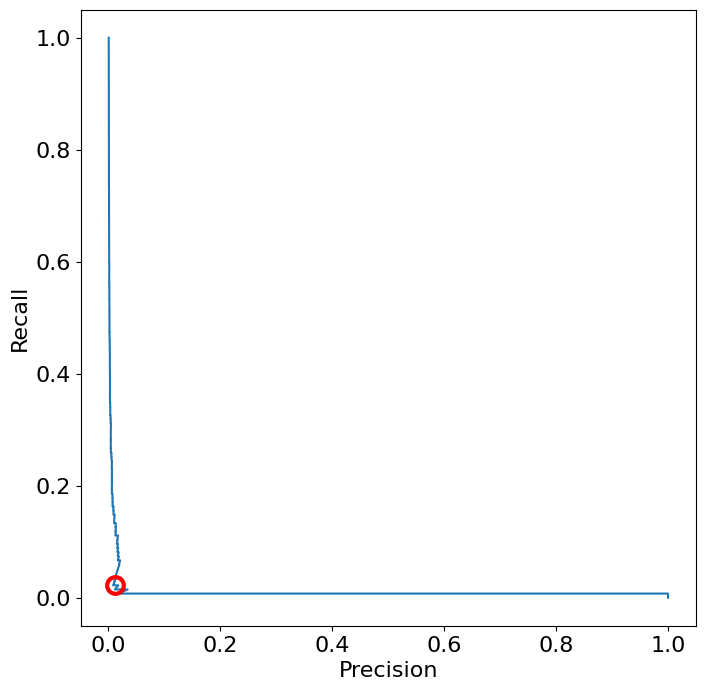

In [31]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.plot(precision, recall, label='Precision-Recall Curve')
ax1.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
ax1.set_xlabel('Precision', fontsize=16)
ax1.set_ylabel('Recall', fontsize=16)
ax1.set_aspect('equal')
plt.show()

AUC: 0.664


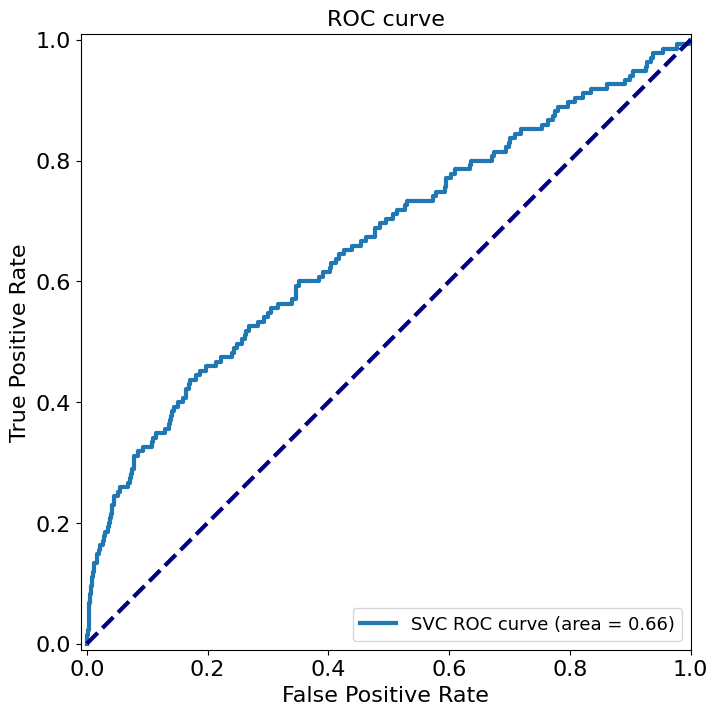

In [32]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('AUC: {:.3f}'.format(roc_auc))

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall').fit(X_train_scaled, y_train)
print(grid_lr.cv_results_['mean_test_score'].reshape(9,2))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python37\lib

[[nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]]


In [34]:
from sklearn.neural_network import MLPClassifier

nnclf = MLPClassifier(hidden_layer_sizes = [5,5], solver='adam', alpha=0.0003, activation='relu',
                     max_iter = 100, random_state = 47).fit(X_train_scaled, y_train)

y_predicted = nnclf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

Recall: 0.000
Precision: 0.000
Accuracy: 0.999
F1: 0.000
[[102984      0]
 [   135      0]]


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
df['Dest mean taxiIn'] = df['TaxiIn'].groupby(df['Dest']).transform('mean')
df['Origin mean taxiOut'] = df['TaxiIn'].groupby(df['Dest']).transform('mean')

X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Distance', 'Carrier mean distance',
       'Dest mean taxiIn', 'Origin mean taxiOut']]

y = df['total_delay']

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_poly = poly.transform(X_test_scaled)

linreg = Ridge(alpha=1.0).fit(X_train_scaled_poly, y_train)

print('(poly deg 5 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled_poly, y_train)))
print('(poly deg 5 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled_poly, y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 31, algorithm='auto').fit(X_train_scaled, y_train)

print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test_scaled, y_test)))

In [ ]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [50,50,50],
                             activation = 'relu',
                             alpha = 0.0003,   #0.0003,
                             solver = 'lbfgs').fit(X_train_scaled, y_train)

print('R-squared test score: {:.3f}'
     .format(mlpreg.score(X_test_scaled, y_test)))